In [1]:
import torch
import os
import pickle
from tqdm import tqdm
from collections import defaultdict
from lmnav.config.default import get_config
from lmnav.dataset.data_gen import _init_envs
from habitat.gym import make_gym_from_config
from habitat.utils.visualizations import maps
from PIL import Image
from sklearn.cluster import SpectralClustering
from multiprocessing import Pool, Manager

os.chdir("/srv/flash1/pputta7/projects/lm-nav")
directory = "data/datasets/lmnav/offline_00744_multipath"

[2023-10-26 19:07:54,935] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
from multiprocessing import Pool 

def load_file(file):
    with open(os.path.join(directory, file), 'rb') as f:
        x = pickle.load(f)
        return (x['episode_id'], len(x['action']), file)
files = os.listdir(directory)

# Use all available CPU cores

with Pool(processes=4) as pool:
    mapping = list(tqdm(pool.imap(load_file, files), total=len(files)))

100%|██████████████████████████████████████████████████| 1681/1681 [03:39<00:00,  7.65it/s]


In [3]:
mapping_dict = defaultdict(lambda: [].copy())
for a, b, c in mapping:
    mapping_dict[a].append((b, c))
with open("test_mapping.pt", "wb+") as f:
    pickle.dump(dict(mapping_dict), f)

In [4]:
with open("test_mapping.pt", "rb") as f:
    mapping_dict = pickle.load(f)

def get_episodes(idx):
    episodes = []
    for _, file in mapping_dict[idx]:
        with open(os.path.join(directory, file), "rb") as f:
            episodes.append(pickle.load(f))
    return episodes

In [6]:
{k: len(v) for k, v in mapping_dict.items()}

{1449: 9,
 8226: 8,
 8130: 2,
 6842: 8,
 8930: 1,
 5105: 4,
 5905: 9,
 2020: 4,
 4362: 3,
 6931: 9,
 3051: 3,
 7367: 9,
 7914: 4,
 7290: 9,
 3220: 9,
 8579: 2,
 8576: 9,
 3173: 4,
 472: 9,
 3495: 1,
 7066: 9,
 853: 9,
 2133: 6,
 1951: 9,
 3634: 2,
 4819: 2,
 2744: 2,
 6291: 9,
 1941: 8,
 8102: 4,
 3820: 9,
 6175: 1,
 4880: 8,
 301: 8,
 7752: 6,
 8771: 3,
 859: 4,
 4045: 7,
 3188: 8,
 1828: 6,
 262: 7,
 6826: 5,
 6043: 5,
 3040: 8,
 2484: 4,
 7735: 6,
 5165: 9,
 6895: 8,
 6803: 4,
 7680: 1,
 944: 5,
 5107: 4,
 3620: 9,
 6807: 8,
 7212: 8,
 8462: 4,
 6799: 8,
 5525: 4,
 8623: 9,
 1821: 8,
 4078: 4,
 2023: 2,
 1405: 4,
 5772: 9,
 497: 6,
 4985: 9,
 4552: 9,
 2067: 4,
 5480: 5,
 4234: 6,
 5649: 9,
 5960: 8,
 3378: 9,
 7933: 4,
 5473: 4,
 5819: 2,
 6778: 7,
 279: 3,
 6458: 4,
 7792: 4,
 8584: 9,
 5740: 8,
 8767: 8,
 6159: 5,
 3885: 6,
 2177: 5,
 4800: 9,
 8043: 6,
 260: 8,
 697: 8,
 6102: 4,
 1567: 4,
 4079: 5,
 5521: 5,
 7751: 4,
 6746: 9,
 7833: 4,
 2766: 4,
 5182: 9,
 1715: 8,
 4872: 9,


In [34]:
idx = 8576
episodes = get_episodes(idx)
mapping_dict[idx]

[(48, 'data.615.pkl'),
 (79, 'data.738.pkl'),
 (99, 'data.594.pkl'),
 (110, 'data.1616.pkl'),
 (141, 'data.682.pkl'),
 (56, 'data.713.pkl'),
 (64, 'data.518.pkl'),
 (104, 'data.559.pkl'),
 (101, 'data.368.pkl')]

In [35]:
episodes[2]['episode_id']

8576

In [36]:
config = get_config("datagen/imagenav_data_gen_env744_multipath_sample")
config.habitat_baselines.num_environments = 1
config.habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.width = 256
config.habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.height = 256

env = make_gym_from_config(config)

2023-10-26 19:21:14,656 Initializing dataset CustomFilterDataset
2023-10-26 19:21:15,166 initializing sim Sim-v0
[19:21:15:188035]:[Warning]:[Assets] ResourceManager.cpp(353)::loadSemanticSceneDescriptor : 2023-10-26 19:21:16,396 Initializing task Nav-v0
SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `data/scene_datasets/hm3d/train/00744-1S7LAXRdDqK/1S7LAXRdDqK.basis.scn` nor constructed filename : `data/scene_datasets/hm3d/train/00744-1S7LAXRdDqK/info_semantic.json` exist on disk.
[19:21:16:393210]:[Warning]:[Sim] Simulator.cpp(508)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 0


Renderer: NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 525.125.06
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


In [37]:
dataset_episodes = env.env.env._env._dataset.episodes

def get_episode_id2idx():
    return {v.episode_id: i for i, v in enumerate(dataset_episodes)}
    
def get_path_points(episode):
    positions, topdownmap = [], []
    done, step = False, 0
    env.env.env._env.current_episode = dataset_episodes[get_episode_id2idx()[episode['episode_id']]]
    env.env.env._env._episode_from_iter_on_reset = False
    obs = env.reset()
    actions = episode['action']

    for action in tqdm(actions.tolist()):
        # roll out a step
        outputs = env.step(action)
        next_observations, rewards_l, done, infos = outputs
    
        # insert episode into list
        topdownmap.append(infos['top_down_map'])
        positions.append(env.env.env._env.sim.get_agent_state().position)
        step += 1

        obs = next_observations

    print("Done in", step, "steps")
    return positions, topdownmap

In [38]:
datas = [get_path_points(episode) for episode in episodes]

100%|██████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.13it/s]


Done in 48 steps


100%|██████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.32it/s]


Done in 79 steps


100%|██████████████████████████████████████████████████████| 99/99 [00:05<00:00, 16.87it/s]


Done in 99 steps


100%|████████████████████████████████████████████████████| 110/110 [00:06<00:00, 17.26it/s]


Done in 110 steps


100%|████████████████████████████████████████████████████| 141/141 [00:07<00:00, 17.64it/s]


Done in 141 steps


100%|██████████████████████████████████████████████████████| 56/56 [00:02<00:00, 19.28it/s]


Done in 56 steps


100%|██████████████████████████████████████████████████████| 64/64 [00:03<00:00, 17.62it/s]


Done in 64 steps


100%|████████████████████████████████████████████████████| 104/104 [00:05<00:00, 17.56it/s]


Done in 104 steps


100%|████████████████████████████████████████████████████| 101/101 [00:06<00:00, 16.46it/s]

Done in 101 steps


In [39]:
map_images = [Image.fromarray(maps.colorize_draw_agent_and_fit_to_height(data[1][0], 256)) for data in datas]

## Cluster

In [40]:
from dtw import dtw
import numpy as np


def euclidean_dist(a, b):
    return np.linalg.norm(np.array(a) - np.array(b), ord=2)


def interpolate_point_pair(v1, v2, t):
    """
    interpolate between two points

    Args:
        v1: point 1
        v2: point 2
        t: parameterized variable

    Returns:

    """
    return tuple((1 - t) * x1 + t * x2 for x1, x2 in zip(v1, v2))


def interpolate_trajectory(trajectory, n):
    """
    given a trajectory, produces n points uniformly along the trajectory

    Args:
        trajectory: path
        n: number of points

    Returns:

    """
    num_points = len(trajectory)
    print(trajectory)

    accum_seg_lens = [0]
    for i in range(1, num_points):
        accum_seg_lens.append(accum_seg_lens[-1] + euclidean_dist(trajectory[i - 1], trajectory[i]))
    # normalize accum_seg_lens
    for i in range(len(accum_seg_lens)):
        accum_seg_lens[i] /= accum_seg_lens[-1]

    # determine segment to use at each point
    seg = 0
    for i in range(n + 1):
        total_percent = i / n
        if total_percent > accum_seg_lens[seg + 1]:
            seg += 1
        assert seg < len(accum_seg_lens) - 1  # if accum_seg_lens was computed properly, this should never be broken
        t = (total_percent - accum_seg_lens[seg]) / (accum_seg_lens[seg + 1] - accum_seg_lens[seg])
        yield interpolate_point_pair(trajectory[seg], trajectory[seg + 1], t)


def compute_uniform_cdtw(path1, path2, success_dist, num_points=50, return_dtw=False):
    """
    computes ndtw between two paths by resampling points uniformly along the trajectory
    Args:
        path1:
        path2:
        success_dist:
        num_points:

    Returns:

    """
    adj_path1 = list(interpolate_trajectory(path1, num_points))
    adj_path2 = list(interpolate_trajectory(path2, num_points))

    return compute_ndtw(adj_path1, adj_path2, success_dist, return_dtw)


def compute_ndtw(query, ref, success_dist, return_dtw=False):
    """
    computes normalized dynamic time warping metric
    Args:
        query:
        ref:
        success_dist:

    Returns:

    """
    dtw_dist, cost_matrix, acc_cost_matrix, path = dtw(query, ref, dist=euclidean_dist)

    nDTW = np.exp(-(dtw_dist / (len(ref) * success_dist)))

    if return_dtw:
        return nDTW, dtw_dist

    return nDTW

In [41]:
# compute distance matrix
dist = torch.zeros(len(episodes), len(episodes))
for i in tqdm(range(len(episodes))):
    for j in range(i, len(episodes)):
        x = np.array(datas[i][0])[:, [0, 2]]
        y = np.array(datas[j][0])[:, [0, 2]]
        d = (compute_ndtw(x, y, 1.0) + compute_ndtw(y, x, 1.0)) / 2
        dist[i, j] = dist[j, i] = d


100%|████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.24it/s]


/coc/testnvme/pputta7/mambaforge/envs/lmnav/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:688: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


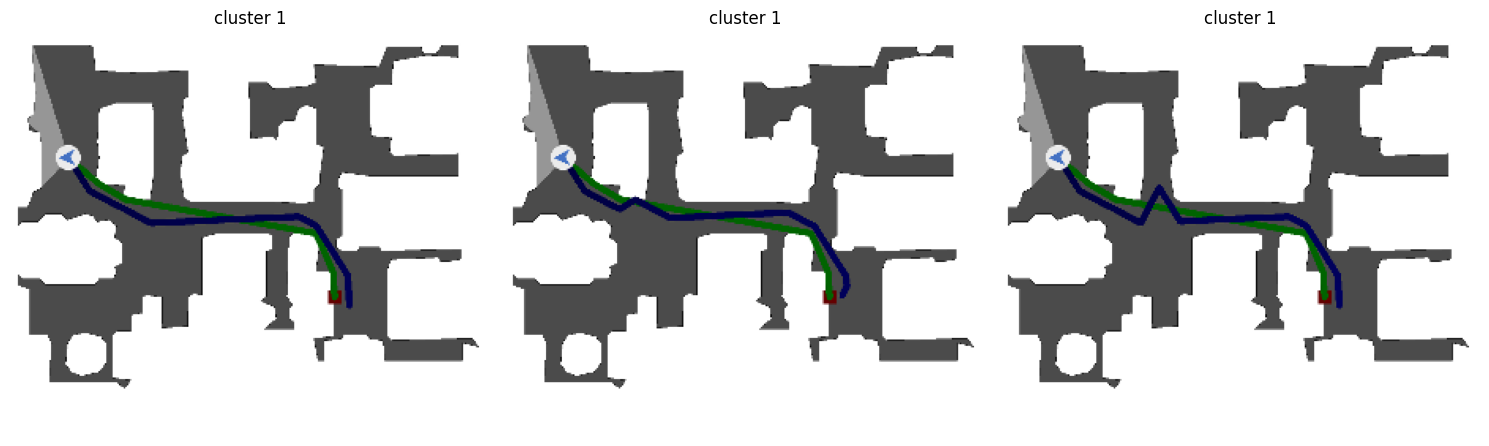

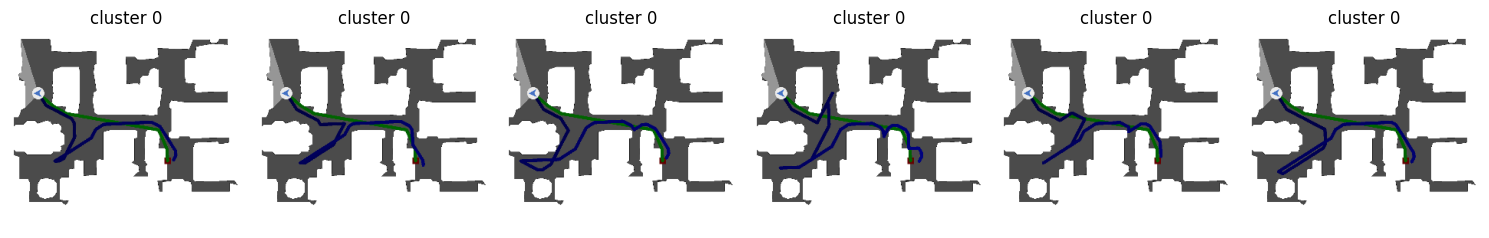

In [44]:
from matplotlib import pyplot as plt
from collections import defaultdict

# Assuming you've already defined map_images and dist

images = map_images
clustering = SpectralClustering(n_clusters=2,
         assign_labels='discretize',
         random_state=0).fit(dist)

# Group images by cluster
clustered_images = defaultdict(list)
for label, img in zip(clustering.labels_, images):
    clustered_images[label].append(img)

for cluster, images_in_cluster in clustered_images.items():    
    # If there's only one image in the cluster
    if len(images_in_cluster) == 1:
        fig, ax = plt.subplots(figsize=(15, 6))
        ax.imshow(images_in_cluster[0])
        ax.axis('off')
        ax.set_title(f"cluster {cluster}")
        plt.show()
    else:
        fig, axes = plt.subplots(1, len(images_in_cluster), figsize=(15, 6))
        captions = [f"cluster {cluster}" for _ in range(len(images_in_cluster))]
        
        for ax, img, caption in zip(axes.ravel(), images_in_cluster, captions):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(caption)
        
        plt.tight_layout()
        plt.show()


In [43]:
dist

tensor([[1.0000, 0.4393, 0.3768, 0.2547, 0.2519, 0.8581, 0.8264, 0.3889, 0.2665],
        [0.4393, 1.0000, 0.7232, 0.6714, 0.5576, 0.4086, 0.4191, 0.7023, 0.6892],
        [0.3768, 0.7232, 1.0000, 0.5907, 0.6263, 0.3612, 0.3676, 0.8324, 0.7823],
        [0.2547, 0.6714, 0.5907, 1.0000, 0.6043, 0.2577, 0.2617, 0.5983, 0.6851],
        [0.2519, 0.5576, 0.6263, 0.6043, 1.0000, 0.2425, 0.2674, 0.6882, 0.6496],
        [0.8581, 0.4086, 0.3612, 0.2577, 0.2425, 1.0000, 0.7799, 0.3947, 0.2328],
        [0.8264, 0.4191, 0.3676, 0.2617, 0.2674, 0.7799, 1.0000, 0.4013, 0.2710],
        [0.3889, 0.7023, 0.8324, 0.5983, 0.6882, 0.3947, 0.4013, 1.0000, 0.7188],
        [0.2665, 0.6892, 0.7823, 0.6851, 0.6496, 0.2328, 0.2710, 0.7188, 1.0000]])

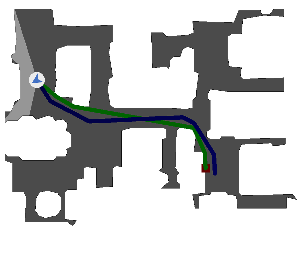

In [46]:
Image.fromarray(maps.colorize_draw_agent_and_fit_to_height(datas[0][1][1], 256))